<a href="https://colab.research.google.com/github/smjacks4/510DW/blob/main/Module_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reflection on the project process:

---

Overall, as a summary of the conclusions, I think that I have done what is needed. I tried to only use AI when necessary. After our email and Discord conversations, I have also tried to use more narrative to explain my work and why I used AI.

I stuggled most this week adding nodes/edges and identifying the weakest link. If I had a dream list of more videos, I think it would be most helpful to have a little video on how to find edges and nodes from a file rather than adding in yourself. Maybe this skill has been built the last few weeks, or maybe I'm missing the application from a video, but I did struggle. Also, removing the weakest link didn't come intuitively, and I couldn't find either step in the videos. (I'm sorry if I am missing this!) I found it the most difficult to figure out adding the nodes/edges, though, so that would be tops on my list of extra help.

Reflection on the project outcomes:

---

Removing the weakest link either increased the number for each of the measured relationships or in a few situations, kept the number the same. Numbers did not decrease. This is illustrated by a comparison of the two readings, with and without the weakest link, the Bronx. The gang the 'Bo-Gars' illustrates these increases:


---


With Bronx
*   Average clustering: 0.39109377084167
*   Centrality degree: e.g., 'Bo-Gars': 0.1764705882352941
*   Betweenness centrality: e.g., 'Bo-Gars': 0.015399088928500693
*   Eigenvector: e.g.,'Bo-Gars': 0.2105244207637474


---


Without Bronx


*   New Average: 0.4025965288076015
*   New Centrality: 'Bo-Gars': 0.18181818181818182
*   New Betweenness: 'Bo-Gars': 0.016361531986531987
*   New Eigenvector: 'Bo-Gars': 0.2105244207637474


The diference in these shows that by removing the Bronx, the remaining gangs, as illustrated by the increased average and data about the Bo-Gars, increase in closeness. The gang V-Block did stay the same in centrality because like Bronx, the values were 0.0. In a ranked list, V-Block was the second weakest link.

Example of V-Block
Original
*   Original Centrality: 'V_Block': 0.0,
*   Original Betweenness: 'V_Block': 0.0,

New
*  New centrality V_Block': 0.0,
*  New betweenness 'V_Block': 0.0,

Something looked weird in the Eigengvector for this one (as well for the original Bronx), so I would likely need to fix it or remove it if I pursued this project. I image it has to do with both not haveing the node values.

*   Old eigenvector: 'Bronx': 7.703636967921907e-13,
*   Old eigenvector: 'V_Block': 7.703636967921907e-13,

*   New eigenvector: 'V_Block': 7.70363696792191e-13,


---
Final Word


To remove the Bronx gang from the streets of Montreal, I would bribe them with the *very* lucrative replacement job of being a mechanical turk for Amazon where they could work from home, and they would be so satisfied with their income from solving human intelligence tasks at their kitchen table that they would never again turn to a life of crime. However, as a public safety official, I would now see that by removing the weakest link, I have made the other gangs closer, so ideally, I should potentailly really just bring in lots of other gang groups so that the gangs feel less connected. Although, if they do feel more connected, is this better for society? Or then, do they team up for even more crime? I am conflicted as to the social answer for this! I guess this potentially brings us to the question of, are gangs that are socially connected to each other more or less likely to engage in illegal activities? This data can't answer this, but it is a great pilot study for additional, adjacent resaerch!

Original link to Montreal street gangs data: https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/montreal-street-gangs?authuser=0

Importing libraries

In [1]:
import networkx as nx
import pandas as pd


Unzipped file - I used this code last week in one of my iterations of the Jeopardy notebooks that didn't end up making the cut but is helpful now

In [2]:
!unzip -o Montreal_Street_Gangs_CSV.zip

Archive:  Montreal_Street_Gangs_CSV.zip
  inflating: CSV/MONTREALGANG.csv    
  inflating: CSV/MONTREALGANG_ATTR.csv  


I always want to see the code first - not sure that will always work for me 😅

In [3]:
nodes_df = pd.read_csv('CSV/MONTREALGANG.csv')
nodes_df

,Unnamed: 0,Bo-Gars,BMF,Green_Land,Lg Side,Plan riel,18th,187,AYB.2,AYB,...,Bronx,LPE,PSC,St.Henri,V_Block,47,Blue_Devil.1,Blue_Devil.2,RTC,Ve_Crew
0,Bo-Gars,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,BMF,1,0,1,0,0,1,1,1,1,...,0,0,0,0,0,1,1,1,1,0
2,Green_Land,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Lg Side,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Plan riel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,18th,1,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,187,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,AYB.2,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,AYB,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Uptown_Posse,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Starting a graph as suggested at 6.2 (0:40)

In [4]:
gangs = nx.Graph()

Getting and adding nodes to the graph - couldn't pick this out of your videos - maybe I'm missing this? 🫣 I saw manually adding edges, but not calling in from a CSV file. My inexperience makes it hard to make the link without Google-ing for help. I can call back to the other weeks when we look at the columns, but I couldn't think of how to put that week's work into this context for nodes

In [5]:
node_names = nodes_df.columns[1:].tolist()

gangs.add_nodes_from(node_names)

nodes_df_indexed = nodes_df.set_index(nodes_df.columns[0])

for source_gang in nodes_df_indexed.index:
    for target_gang in nodes_df_indexed.columns:

        if source_gang != target_gang and nodes_df_indexed.loc[source_gang, target_gang] == 1:

            gangs.add_edge(source_gang, target_gang)

Measuring things 1 - I put where I tested these out as shown in what video and at what time.
*  6.2 (4:55) nx.average_clustering(gangs)


In [6]:
nx.average_clustering(gangs)

0.39109377084167

Measuring things 2
*  6.2 (7:21) nx.degree_centrality

In [7]:
centrality = nx.degree_centrality(gangs)
nx.degree_centrality(gangs)

{'Bo-Gars': 0.1764705882352941,
 'BMF': 0.5294117647058824,
 'Green_Land': 0.058823529411764705,
 'Lg Side': 0.058823529411764705,
 'Plan riel': 0.029411764705882353,
 '18th': 0.4411764705882353,
 '187': 0.08823529411764705,
 'AYB.2': 0.08823529411764705,
 'AYB': 0.23529411764705882,
 'Uptown_Posse': 0.08823529411764705,
 'Dangerous_Street': 0.08823529411764705,
 'DPC': 0.08823529411764705,
 'J.O.K.E.R.S': 0.20588235294117646,
 'Pie-IX': 0.23529411764705882,
 'Px-80': 0.14705882352941177,
 '50 Niggaz': 0.20588235294117646,
 '13th': 0.4411764705882353,
 '67': 0.08823529411764705,
 '99': 0.14705882352941177,
 '146': 0.029411764705882353,
 'Black_Dragons': 0.029411764705882353,
 'Outlaws': 0.029411764705882353,
 'South_Side': 0.1764705882352941,
 'White_Tigers': 0.029411764705882353,
 'Motard': 0.029411764705882353,
 'Bronx': 0.0,
 'LPE': 0.029411764705882353,
 'PSC': 0.029411764705882353,
 'St.Henri': 0.029411764705882353,
 'V_Block': 0.0,
 '47': 0.23529411764705882,
 'Blue_Devil.1': 0.0

Measuring things 3

6.2 (5:49) - nx.betweenness centrality



In [8]:
betweenness = nx.betweenness_centrality(gangs)
nx.betweenness_centrality(gangs)

{'Bo-Gars': 0.015399088928500693,
 'BMF': 0.2110792801969273,
 'Green_Land': 0.0,
 'Lg Side': 0.0,
 'Plan riel': 0.0,
 '18th': 0.097076507370625,
 '187': 0.00035650623885918,
 'AYB.2': 0.0,
 'AYB': 0.09868644427467956,
 'Uptown_Posse': 0.0,
 'Dangerous_Street': 0.0002228163992869875,
 'DPC': 0.0013864131511190333,
 'J.O.K.E.R.S': 0.052871148459383746,
 'Pie-IX': 0.024168859462977105,
 'Px-80': 0.0005199049316696374,
 '50 Niggaz': 0.015794499618029027,
 '13th': 0.14280055456526045,
 '67': 0.0,
 '99': 0.0034759358288770047,
 '146': 0.0,
 'Black_Dragons': 0.0,
 'Outlaws': 0.0,
 'South_Side': 0.006071216365334012,
 'White_Tigers': 0.0,
 'Motard': 0.0,
 'Bronx': 0.0,
 'LPE': 0.0,
 'PSC': 0.0,
 'St.Henri': 0.0,
 'V_Block': 0.0,
 '47': 0.10241066123419065,
 'Blue_Devil.1': 0.0011883541295306,
 'Blue_Devil.2': 0.05120816003168943,
 'RTC': 0.009508247743541861,
 'Ve_Crew': 0.0053475935828877}

Measuring things 4
eigenvector - 6.2 (8:00)

In [9]:
eigenvector = nx.eigenvector_centrality(gangs)
nx.eigenvector_centrality(gangs)

{'Bo-Gars': 0.2105244207637474,
 'BMF': 0.4148692980152406,
 'Green_Land': 0.0757008555196278,
 'Lg Side': 0.0931952688142736,
 'Plan riel': 0.023989212477533283,
 '18th': 0.3681971445743652,
 '187': 0.11902750535107207,
 'AYB.2': 0.12402658569174499,
 'AYB': 0.21197117724303627,
 'Uptown_Posse': 0.12402658569174499,
 'Dangerous_Street': 0.0998814154380276,
 'DPC': 0.12194804505394953,
 'J.O.K.E.R.S': 0.19529578627296182,
 'Pie-IX': 0.23715001223609336,
 'Px-80': 0.20253232212104919,
 '50 Niggaz': 0.22516925013129277,
 '13th': 0.37948825064350816,
 '67': 0.14490691185636811,
 '99': 0.1903180748444167,
 '146': 0.023989212477533283,
 'Black_Dragons': 0.026421030852728993,
 'Outlaws': 0.01728580621722361,
 'South_Side': 0.1846922069349596,
 'White_Tigers': 0.026421030852728993,
 'Motard': 0.0243424902149335,
 'Bronx': 7.703636967921907e-13,
 'LPE': 1.0506528242330613e-07,
 'PSC': 1.0506528242330613e-07,
 'St.Henri': 1.0506528242330613e-07,
 'V_Block': 7.703636967921907e-13,
 '47': 0.19245

Figuring out the weakest link

In [10]:
weakest_link = min(centrality, key=centrality.get)
print(f"Weakest link: {weakest_link}")


Weakest link: Bronx


Removing weakest link

In [11]:
gangs.remove_node(weakest_link)

Measuring again

In [12]:
new_centrality = nx.degree_centrality(gangs)
new_betweenness = nx.betweenness_centrality(gangs)
new_average = nx.average_clustering(gangs)
new_eigen = nx.eigenvector_centrality(gangs)

In [13]:
new_average

0.4025965288076015

In [14]:
new_centrality

{'Bo-Gars': 0.18181818181818182,
 'BMF': 0.5454545454545454,
 'Green_Land': 0.06060606060606061,
 'Lg Side': 0.06060606060606061,
 'Plan riel': 0.030303030303030304,
 '18th': 0.4545454545454546,
 '187': 0.09090909090909091,
 'AYB.2': 0.09090909090909091,
 'AYB': 0.24242424242424243,
 'Uptown_Posse': 0.09090909090909091,
 'Dangerous_Street': 0.09090909090909091,
 'DPC': 0.09090909090909091,
 'J.O.K.E.R.S': 0.21212121212121213,
 'Pie-IX': 0.24242424242424243,
 'Px-80': 0.15151515151515152,
 '50 Niggaz': 0.21212121212121213,
 '13th': 0.4545454545454546,
 '67': 0.09090909090909091,
 '99': 0.15151515151515152,
 '146': 0.030303030303030304,
 'Black_Dragons': 0.030303030303030304,
 'Outlaws': 0.030303030303030304,
 'South_Side': 0.18181818181818182,
 'White_Tigers': 0.030303030303030304,
 'Motard': 0.030303030303030304,
 'LPE': 0.030303030303030304,
 'PSC': 0.030303030303030304,
 'St.Henri': 0.030303030303030304,
 'V_Block': 0.0,
 '47': 0.24242424242424243,
 'Blue_Devil.1': 0.0909090909090909

In [15]:
new_betweenness

{'Bo-Gars': 0.016361531986531987,
 'BMF': 0.22427173520923527,
 'Green_Land': 0.0,
 'Lg Side': 0.0,
 'Plan riel': 0.0,
 '18th': 0.10314378908128907,
 '187': 0.00037878787878787884,
 'AYB.2': 0.0,
 'AYB': 0.10485434704184704,
 'Uptown_Posse': 0.0,
 'Dangerous_Street': 0.00023674242424242425,
 'DPC': 0.0014730639730639729,
 'J.O.K.E.R.S': 0.05617559523809524,
 'Pie-IX': 0.025679413179413177,
 'Px-80': 0.0005523989898989899,
 '50 Niggaz': 0.016781655844155842,
 '13th': 0.15172558922558924,
 '67': 0.0,
 '99': 0.0036931818181818177,
 '146': 0.0,
 'Black_Dragons': 0.0,
 'Outlaws': 0.0,
 'South_Side': 0.006450667388167388,
 'White_Tigers': 0.0,
 'Motard': 0.0,
 'LPE': 0.0,
 'PSC': 0.0,
 'St.Henri': 0.0,
 'V_Block': 0.0,
 '47': 0.10881132756132757,
 'Blue_Devil.1': 0.0012626262626262625,
 'Blue_Devil.2': 0.05440867003367003,
 'RTC': 0.010102513227513227,
 'Ve_Crew': 0.005681818181818182}

In [16]:
new_eigen

{'Bo-Gars': 0.2105244207637474,
 'BMF': 0.4148692980152406,
 'Green_Land': 0.0757008555196278,
 'Lg Side': 0.0931952688142736,
 'Plan riel': 0.023989212477533283,
 '18th': 0.3681971445743652,
 '187': 0.11902750535107207,
 'AYB.2': 0.12402658569174499,
 'AYB': 0.21197117724303627,
 'Uptown_Posse': 0.12402658569174499,
 'Dangerous_Street': 0.0998814154380276,
 'DPC': 0.1219480450539495,
 'J.O.K.E.R.S': 0.19529578627296182,
 'Pie-IX': 0.23715001223609336,
 'Px-80': 0.20253232212104919,
 '50 Niggaz': 0.22516925013129277,
 '13th': 0.37948825064350805,
 '67': 0.14490691185636811,
 '99': 0.1903180748444167,
 '146': 0.023989212477533283,
 'Black_Dragons': 0.026421030852728993,
 'Outlaws': 0.01728580621722361,
 'South_Side': 0.1846922069349596,
 'White_Tigers': 0.026421030852728993,
 'Motard': 0.024342490214933496,
 'LPE': 1.0506528242330616e-07,
 'PSC': 1.0506528242330616e-07,
 'St.Henri': 1.0506528242330616e-07,
 'V_Block': 7.70363696792191e-13,
 '47': 0.19245850951681603,
 'Blue_Devil.1': 0.

As mentioned 6.2 (4:03), print(nx.info(gangs)) did not work and Gemini told me to correct to do the following code:

print(f"Number of nodes: {len(gangs.nodes())}")
print(f"Number of edges: {len(gangs.edges())}")

---



In [17]:
#print(nx.info(gangs))

In [21]:
print(f"Number of nodes: {len(gangs.nodes())}")
print(f"Number of edges: {len(gangs.edges())}")

Number of nodes: 34
Number of edges: 78


Making a visual as suggested at 6.2 (8:58)

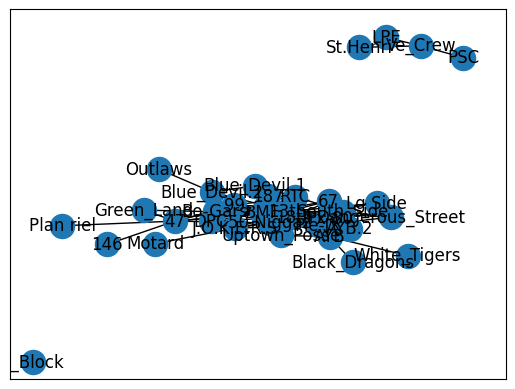

In [19]:
nx.draw_networkx(gangs)

Trying again with 6.2 (11:29) recommendations

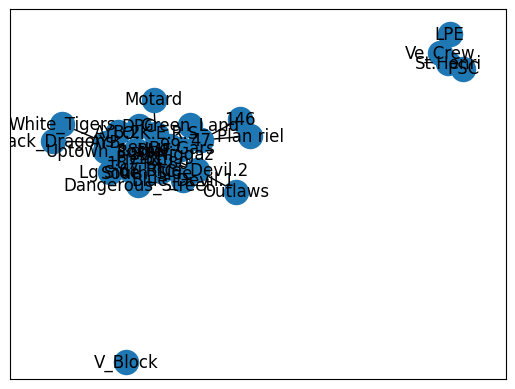

In [24]:
nx.spring_layout(gangs)
nx.draw_networkx(gangs)

Trying again with 6.3 (11:57-12:26), with and without labels


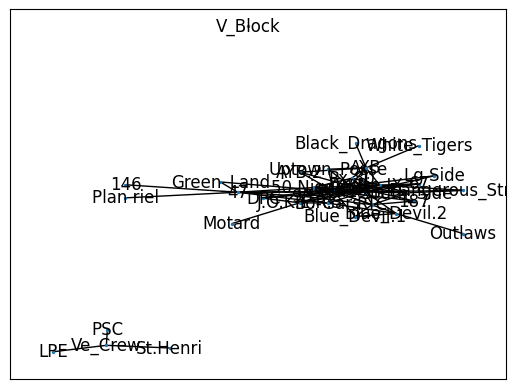

In [32]:
nx.draw_networkx(gangs,node_size=2)

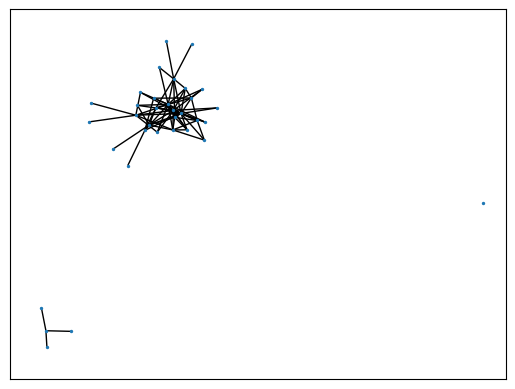

In [33]:
nx.draw_networkx(gangs,with_labels=False,node_size=2)

More bad attempts

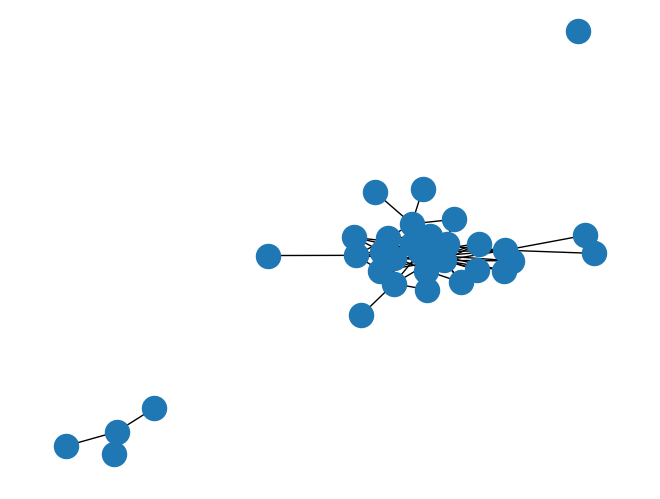

In [22]:
nx.draw(gangs)

I thought my visuals were all pretty bad, so AI suggested more ideas. I didn't like these, either. I would proably do something radically different if I wanted to actually use a visual for this data.

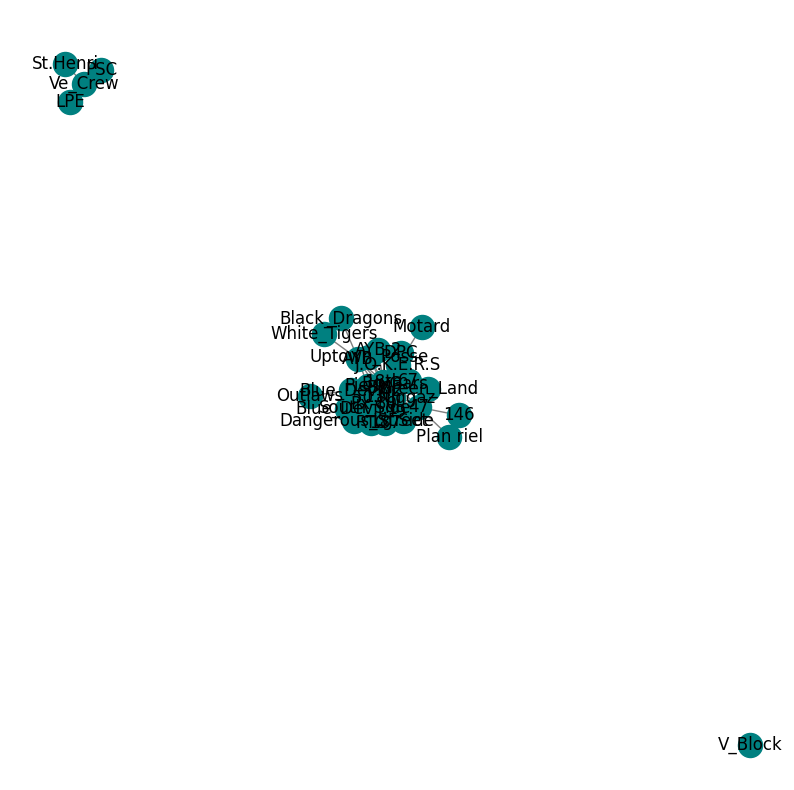

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(gangs, k=0.1)
nx.draw_networkx_nodes(gangs, pos, node_color='teal')
nx.draw_networkx_edges(gangs, pos, edge_color='gray')
nx.draw_networkx_labels(, pos)
plt.axis('off')
plt.show()


In [ ]:
import plotly.graph_objects as go

pos = nx.spring_layout(gangs)
node_x = [pos[node][0] for node in gangs.nodes()]
node_y = [pos[node][1] for node in gangs.nodes()]
edge_x = []
edge_y = []
for edge in gangs.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

fig = go.Figure(data=[go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(color='gray')
), go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    marker=dict(color='lightblue')
)])
fig.update_layout(
    xaxis=dict(range=[-1.1, 1.1]),
    yaxis=dict(range=[-1.1, 1.1])
)
fig.show()


All in all, this was cool and seemed somewhat practical to think about the links between things, espcially when thinking about designing an actual resarch project. The visuals appeal to me less, though, because they seem to be poorly made by me, haha. I think if I did this more often I would understand the dimensions of the results better and understand what the best questions to ask if I did have data like this.